In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
df = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\sales_data_sample.csv", encoding='latin1')

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [11]:
df['ORDERDATE'].head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]

In [12]:
df.drop(columns=['ADDRESSLINE2'], inplace=True)

In [14]:
df['STATE'] = df['STATE'].fillna('Unknown')
df['TERRITORY'] = df['TERRITORY'].fillna('Unknown')
df['POSTALCODE'] = df['POSTALCODE'].fillna('00000')


In [15]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


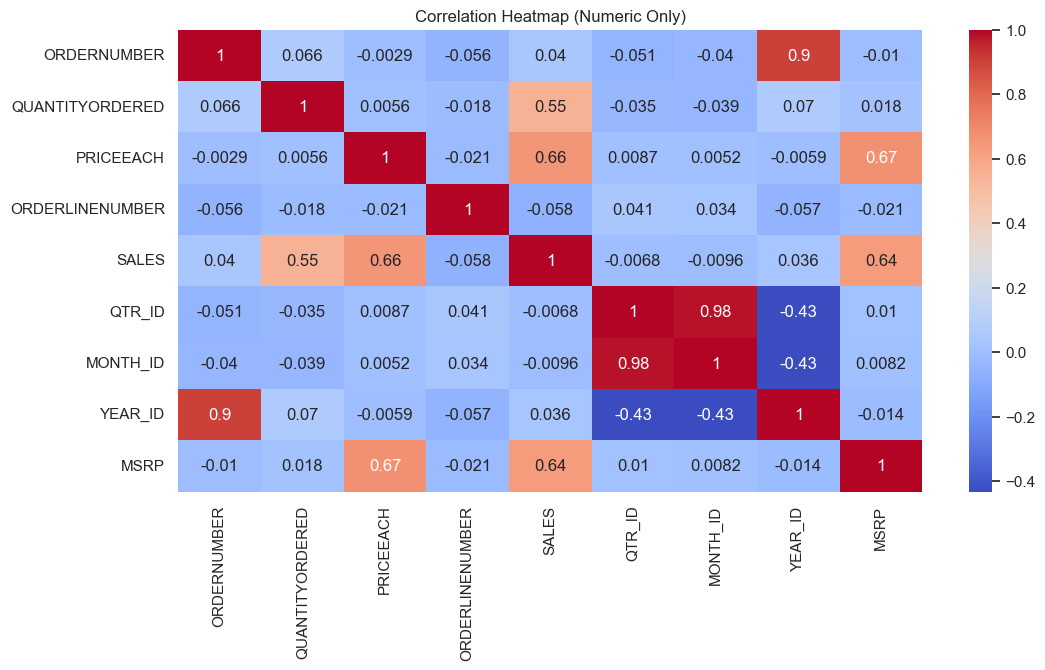

In [18]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_4156\3757909937.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_sorted.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum()


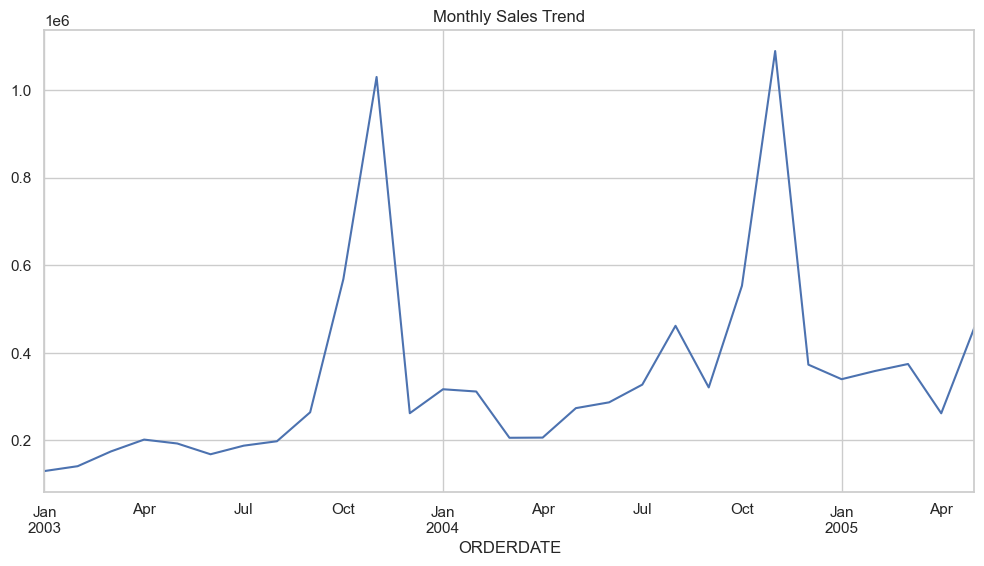

In [20]:
df_sorted = df.sort_values('ORDERDATE')
monthly_sales = df_sorted.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


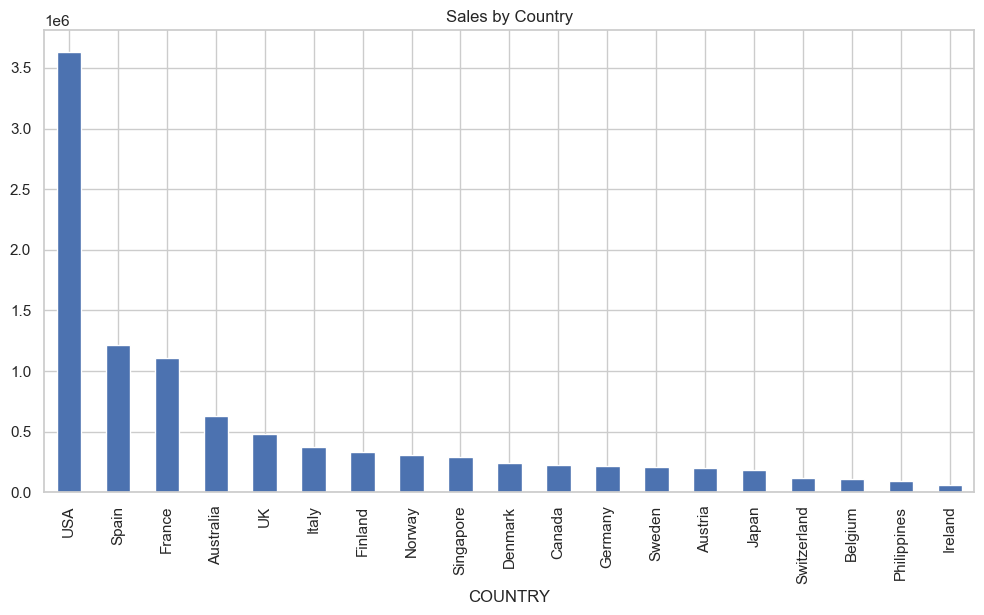

In [21]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar')
plt.title("Sales by Country")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_4156\3095400903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')


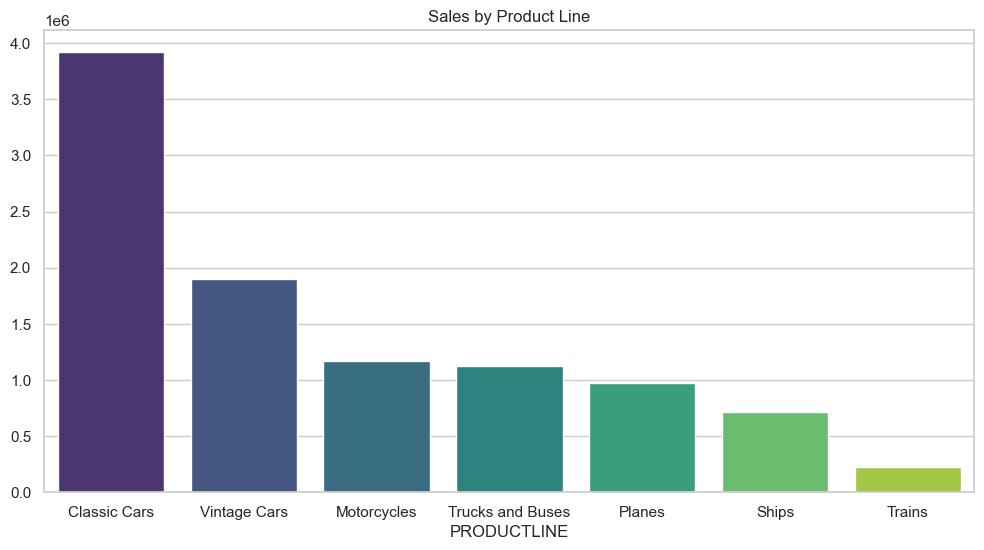

In [22]:
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.title("Sales by Product Line")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_4156\3724105056.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEALSIZE', y='SALES', data=df, palette='Set2')


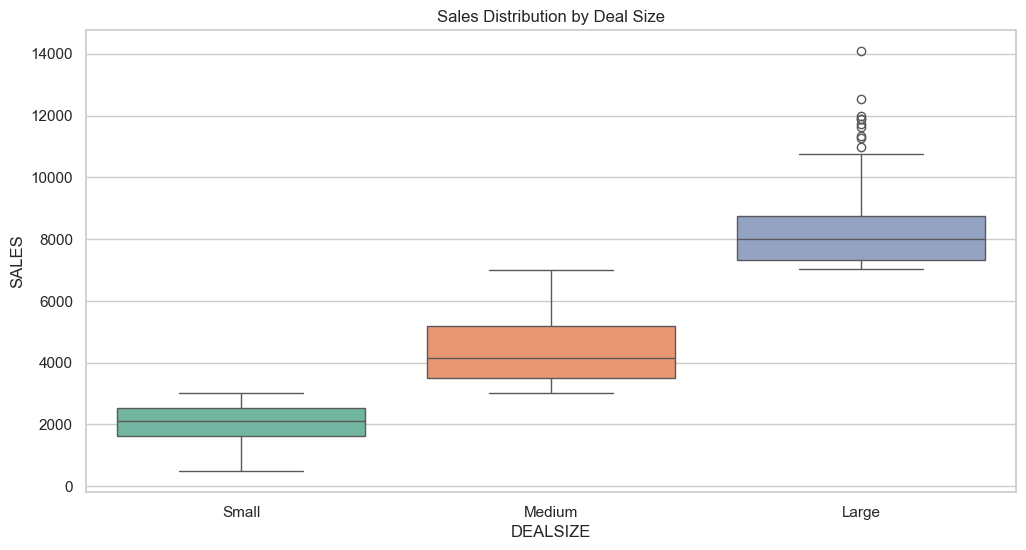

In [23]:
sns.boxplot(x='DEALSIZE', y='SALES', data=df, palette='Set2')
plt.title("Sales Distribution by Deal Size")
plt.show()
